In [3]:
import clip_feature_extractor
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
from sklearn.manifold import TSNE
import os


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
root = os.path.expanduser("~/.cache")
from torchvision.transforms import ToTensor

root = os.path.expanduser("~/.cache")
train_dataset = CIFAR10(root=root, train=True, download=True, transform=ToTensor())
test_dataset = CIFAR10(root=root, train=False, download=True, transform=ToTensor())

x_train_original_CIFAR10 = np.array([np.array(img).flatten() for img, _ in train_dataset])
y_train_original_CIFAR10 = np.array([label for _, label in train_dataset])

cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                   'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


Explained variance by each PC: [0.2907663  0.1125315  0.06694412]
Total explained variance by the first 3 PCs: 0.4702419


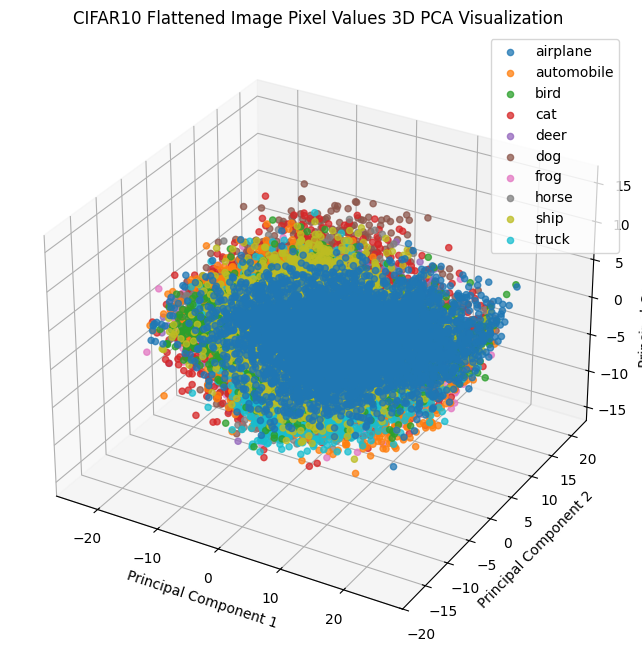

In [ ]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(x_train_original_CIFAR10)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(y_train_original_CIFAR10):
    idx = y_train_original_CIFAR10 == label
    ax.scatter(
        X_train_pca[idx, 0], 
        X_train_pca[idx, 1], 
        X_train_pca[idx, 2], 
        label=cifar10_classes[label], 
        alpha=0.75
    )

ax.set_title("CIFAR10 Flattened Image Pixel Values 3D PCA Visualization")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()

plt.show()

In [5]:
X_train_CIFAR10, y_train_CIFAR10, X_test_CIFAR10, y_test_CIFAR10 = clip_feature_extractor.get_CIFAR10_features()

Files already downloaded and verified
Files already downloaded and verified
Loaded features from disk.


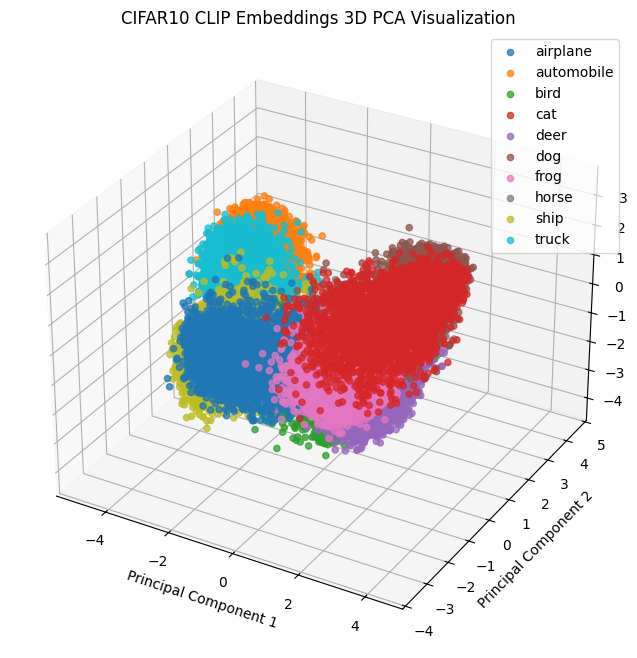

In [6]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_CIFAR10)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(y_train_CIFAR10):
    idx = y_train_CIFAR10 == label
    ax.scatter(
        X_train_pca[idx, 0], 
        X_train_pca[idx, 1], 
        X_train_pca[idx, 2], 
        label=cifar10_classes[label], 
        alpha=0.75
    )

ax.set_title("CIFAR10 CLIP Embeddings 3D PCA Visualization")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.show()

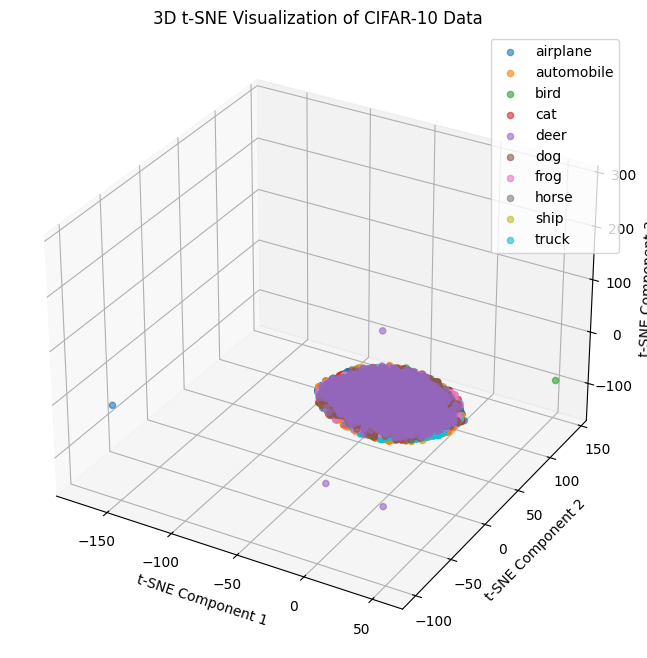

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42, perplexity=30)
X_train_tsne_3D = tsne.fit_transform(x_train_original_CIFAR10)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(y_train_original_CIFAR10):
    idx = y_train_original_CIFAR10 == label
    ax.scatter(
        X_train_tsne_3D[idx, 0], 
        X_train_tsne_3D[idx, 1], 
        X_train_tsne_3D[idx, 2], 
        label=cifar10_classes[label], 
        alpha=0.6
    )

ax.set_title("3D t-SNE Visualization of CIFAR-10 Data")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_zlabel("t-SNE Component 3")
ax.legend()
plt.show()